# Melanoma Classification Using Google AutoML and Integration into an iOS App

## Step 1: Upload Your Images to a Google Storage Bucket

Because Google Vision AutoML is located in the US Central1 region, your bucket also needs to be located within that region.  The Kaggle Melanoma Classification dataset has over 30,000 images and would take a very long time by utilizing drag and drop (you can only upload 500 images at a time using such methods).  The ideal method to upload images quickly is by using multi threading over Google Cloud SDK Shell:
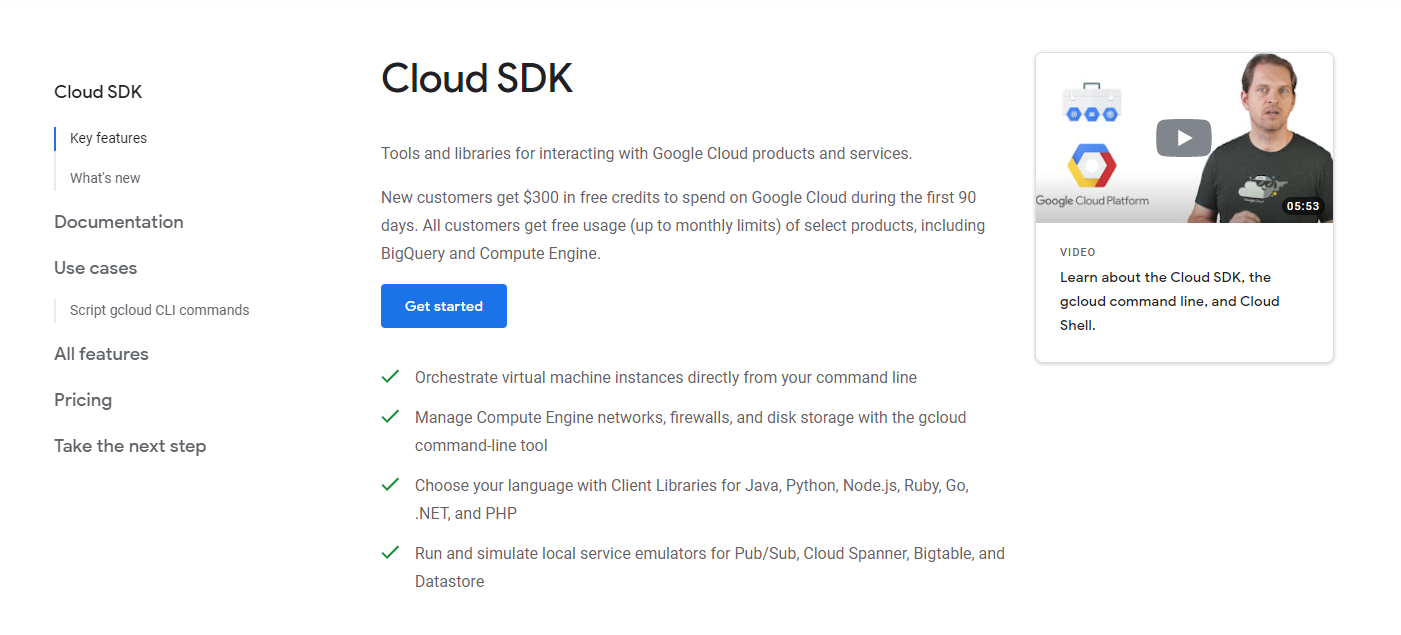
Utizling this command line tool you can upload 30,000 images in just about an hour, depending on your internet speed.  

## Step 2: Create a Labels CSV File and Store it Within Your Bucket

The labels csv file can be created utizling the Google Cloud SDK Shell mentioned above and will create a csv file with the location of each image stored in the bucket.  You will then have to append labels to the csv file.  The method that I chose to append labels is by combining the Kaggle Train.csv with the csv file that was created.  Once your csv file is created and stored in your bucket open up Google Vision AutoML:
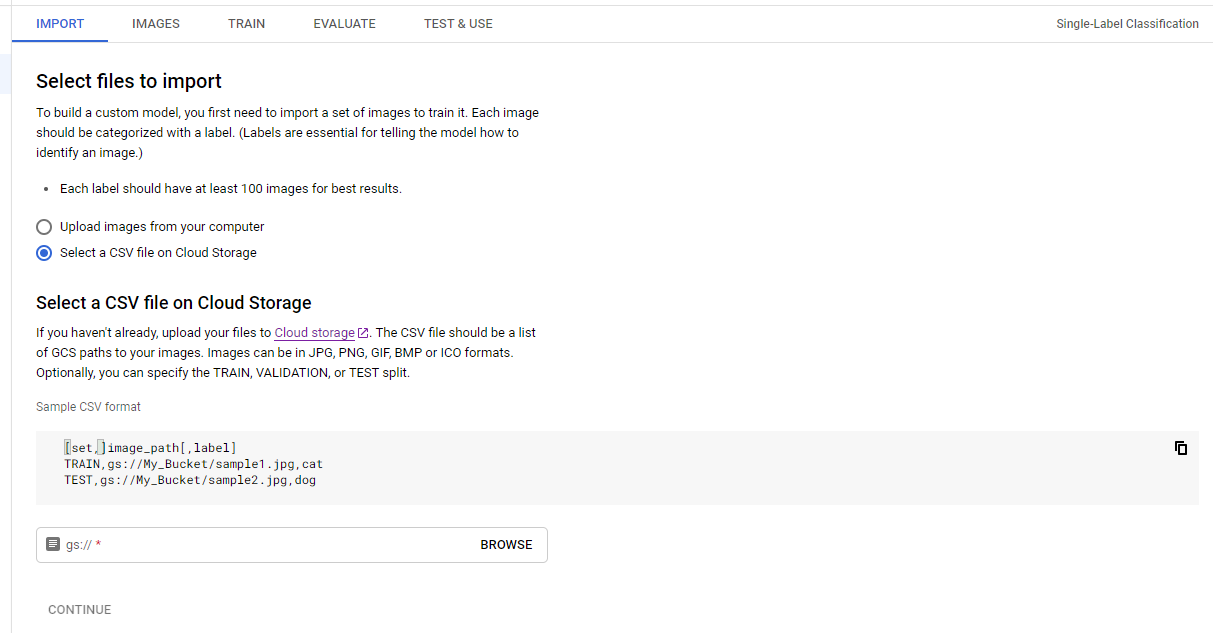
On the import screen you can see the format of the csv file (set, image_path, label) and select the labels.csv from your storage bucket.  The images will then be imported to Google Vision AutoML

## Step 3: Inspect the Images in Google Vision AutoML

All of the images in your dataset can then be viewed within AutoML.  Label stats can be viewed and in this particular datset we have a class imbalance issue (32,112 benign images vs. 581 malignant images).
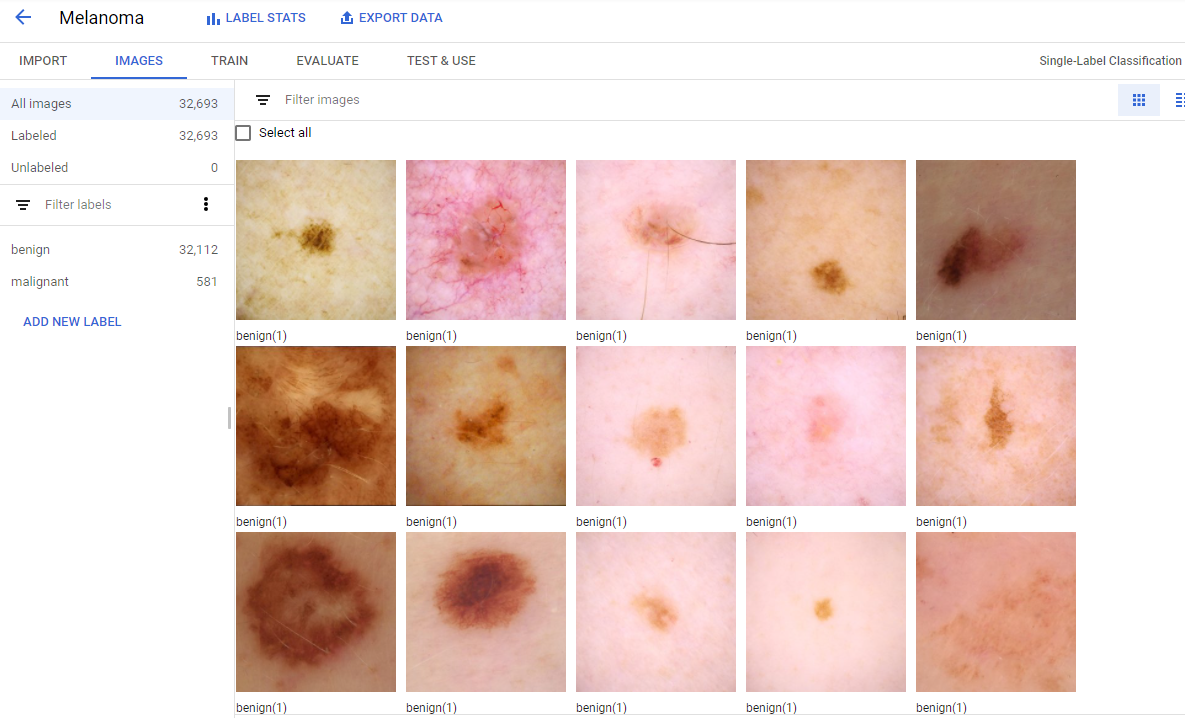

## Step 4: Train A New Model

The next step is to train your model.  Because we are looking to build an iOS app the model should be optimized for an Edge device so choose that option:
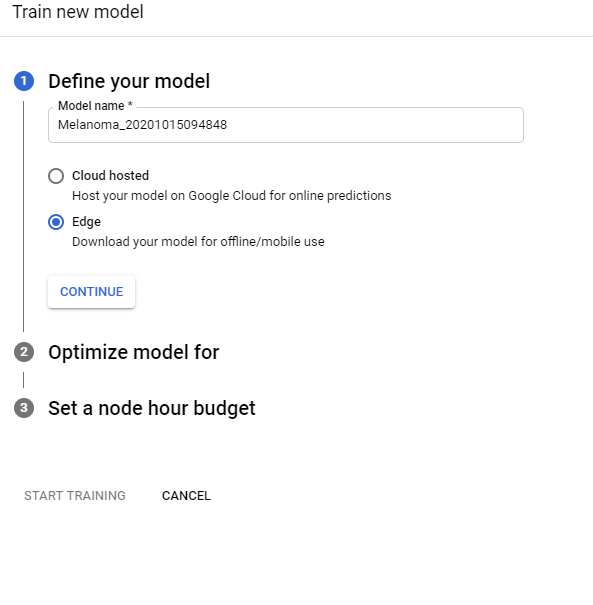

You can then choose how you want to optimize your model: should it be built for faster predictions or higher accuracy?  Because our application is a medical prediciton higher accuracy is prefered.
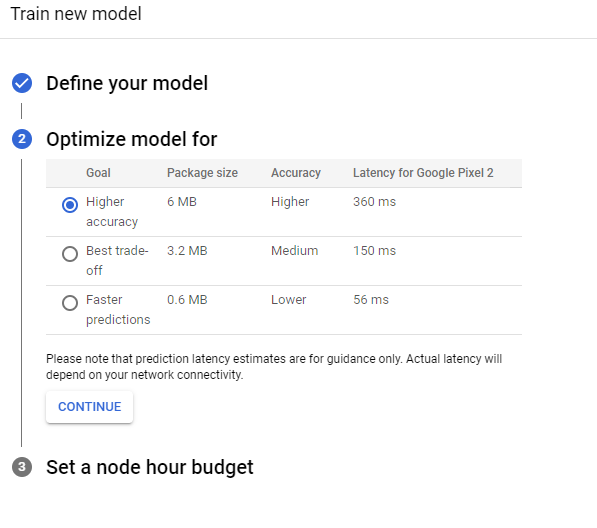

Finally, set your node hour budget and start training:
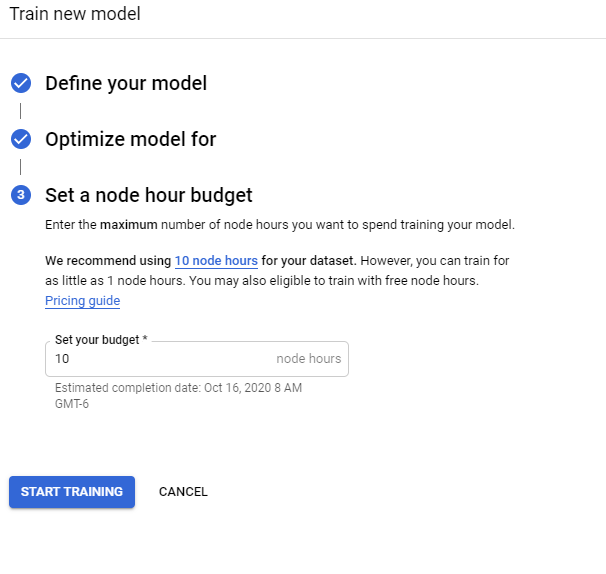

## Step 5: Evaluate Your Model

Once the model is done training (this can take quite a long time depending on how many images are in your dataset) you can evaluate the model within the evaluate tab:
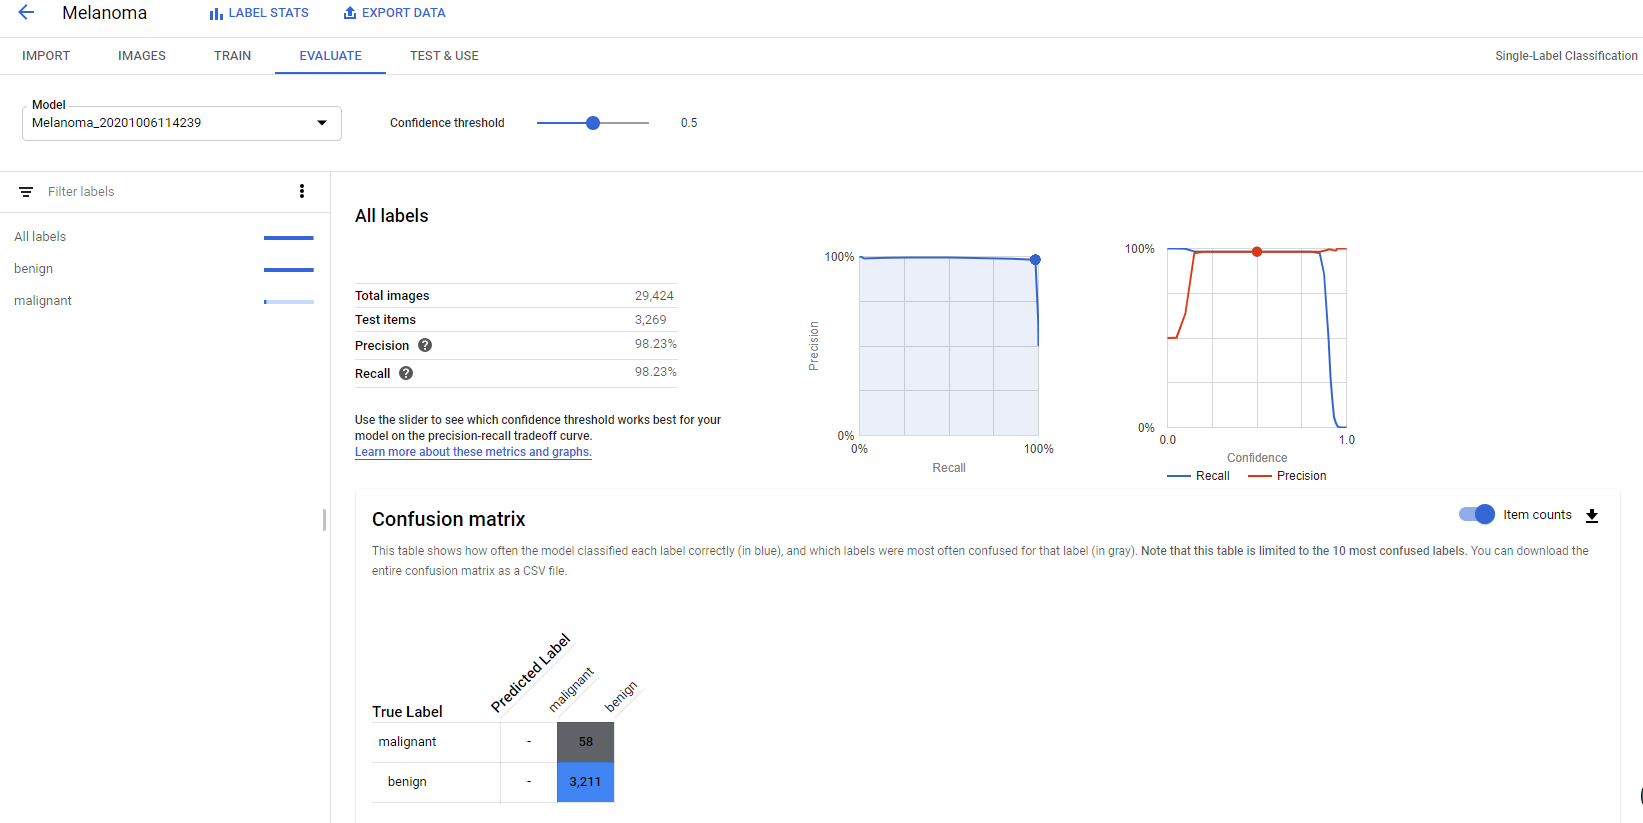
Because we have a class imablance problem the model, in the case, only predicted images as benign.

Lesson: Balance your dataset before uploading to Google Vision AutoML through undersampling or some other method.  

### Step 5A: Retrain Model Using a Balanced Dataset

I chose to eliminate benign images until the dataset was balanced between malignant and benign moles.  Once the model was retrained using this balanced dataset predictions where much better:
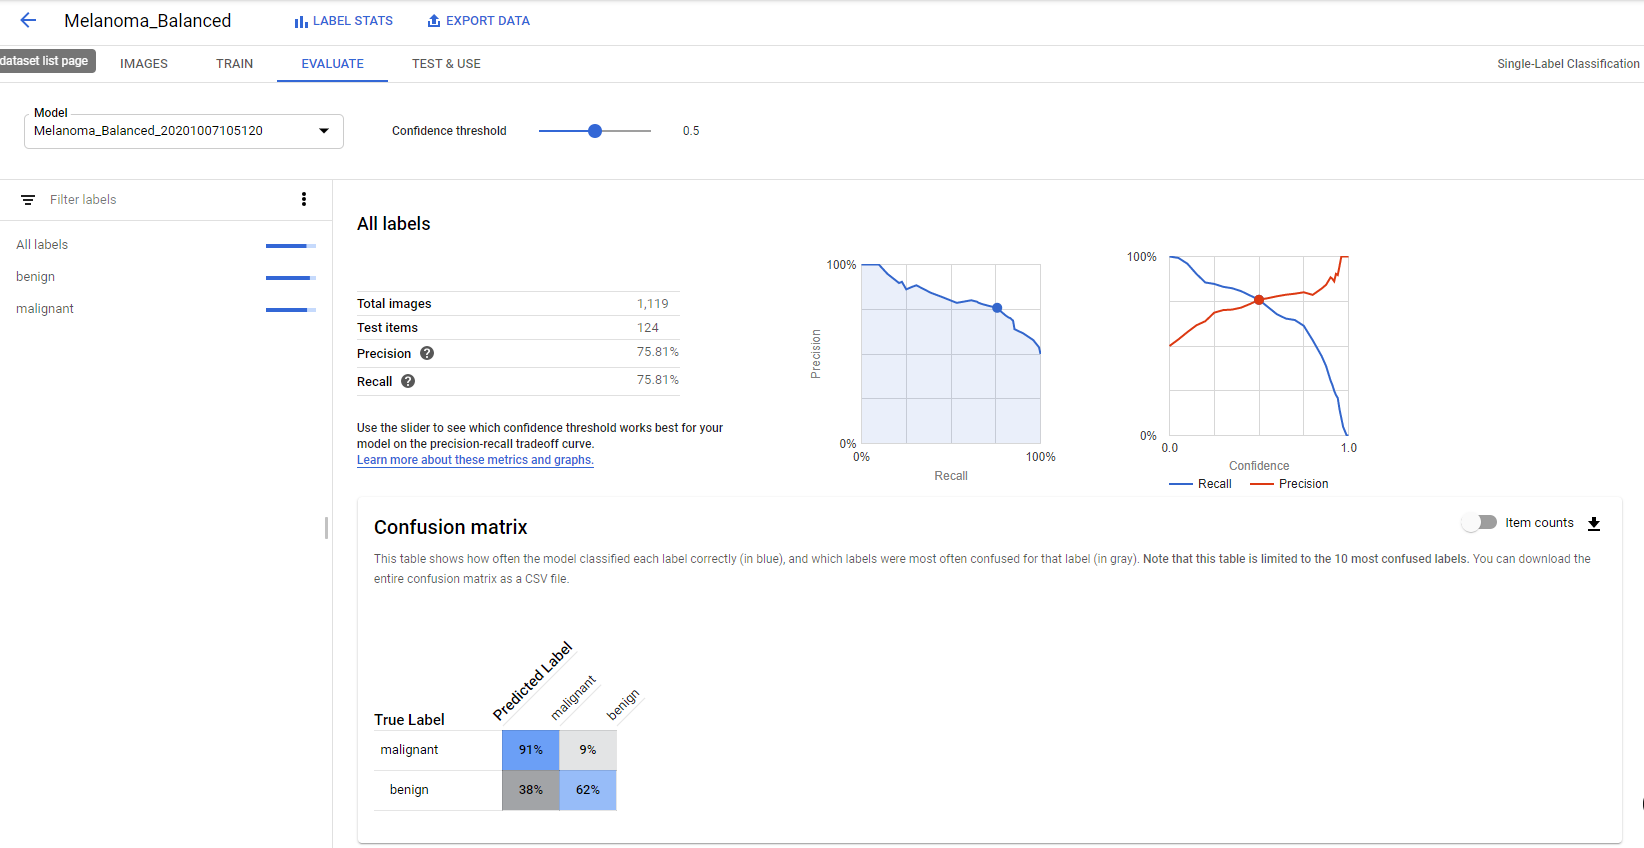

## Step 6: Export Your Model To Core ML

The next step is going to the test and use tab and exporting our model to Core ML for integration into an iOS app.  
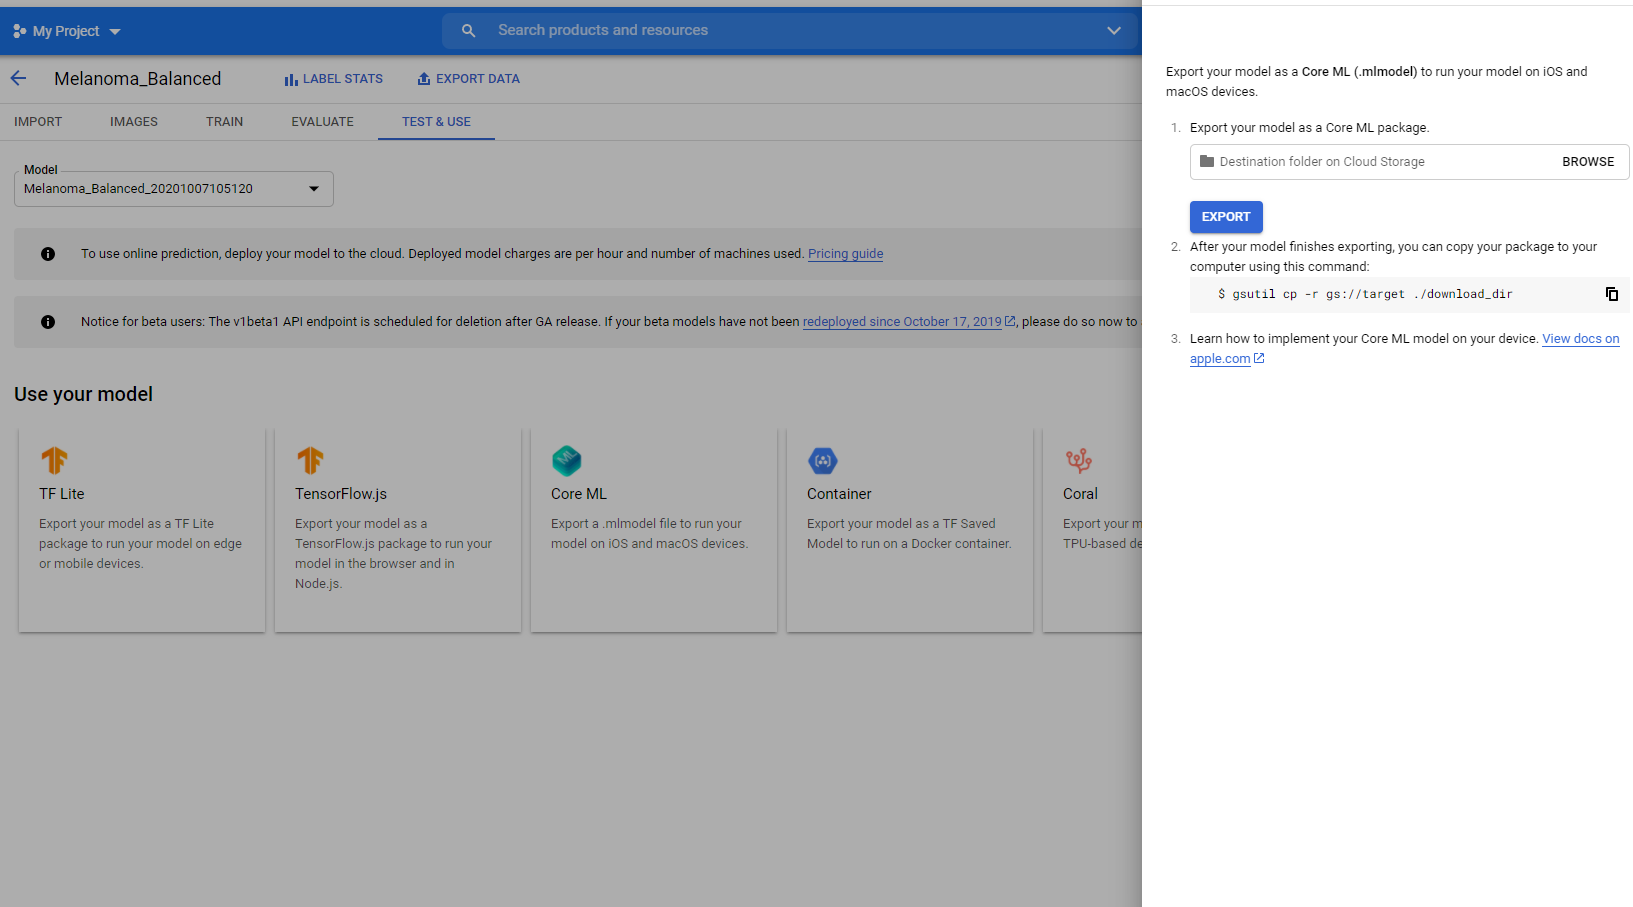
You have to export your model to your storage bucket and then the directory can be downloaded utilizing gsutil.  

## Step 7: Go To Apple and Download the Classifying IMages with Vision and Core ML Sample Project

The idea was to use the sample project and drag in the mlmodel from Google AutoML, as many other tutorials do online.  
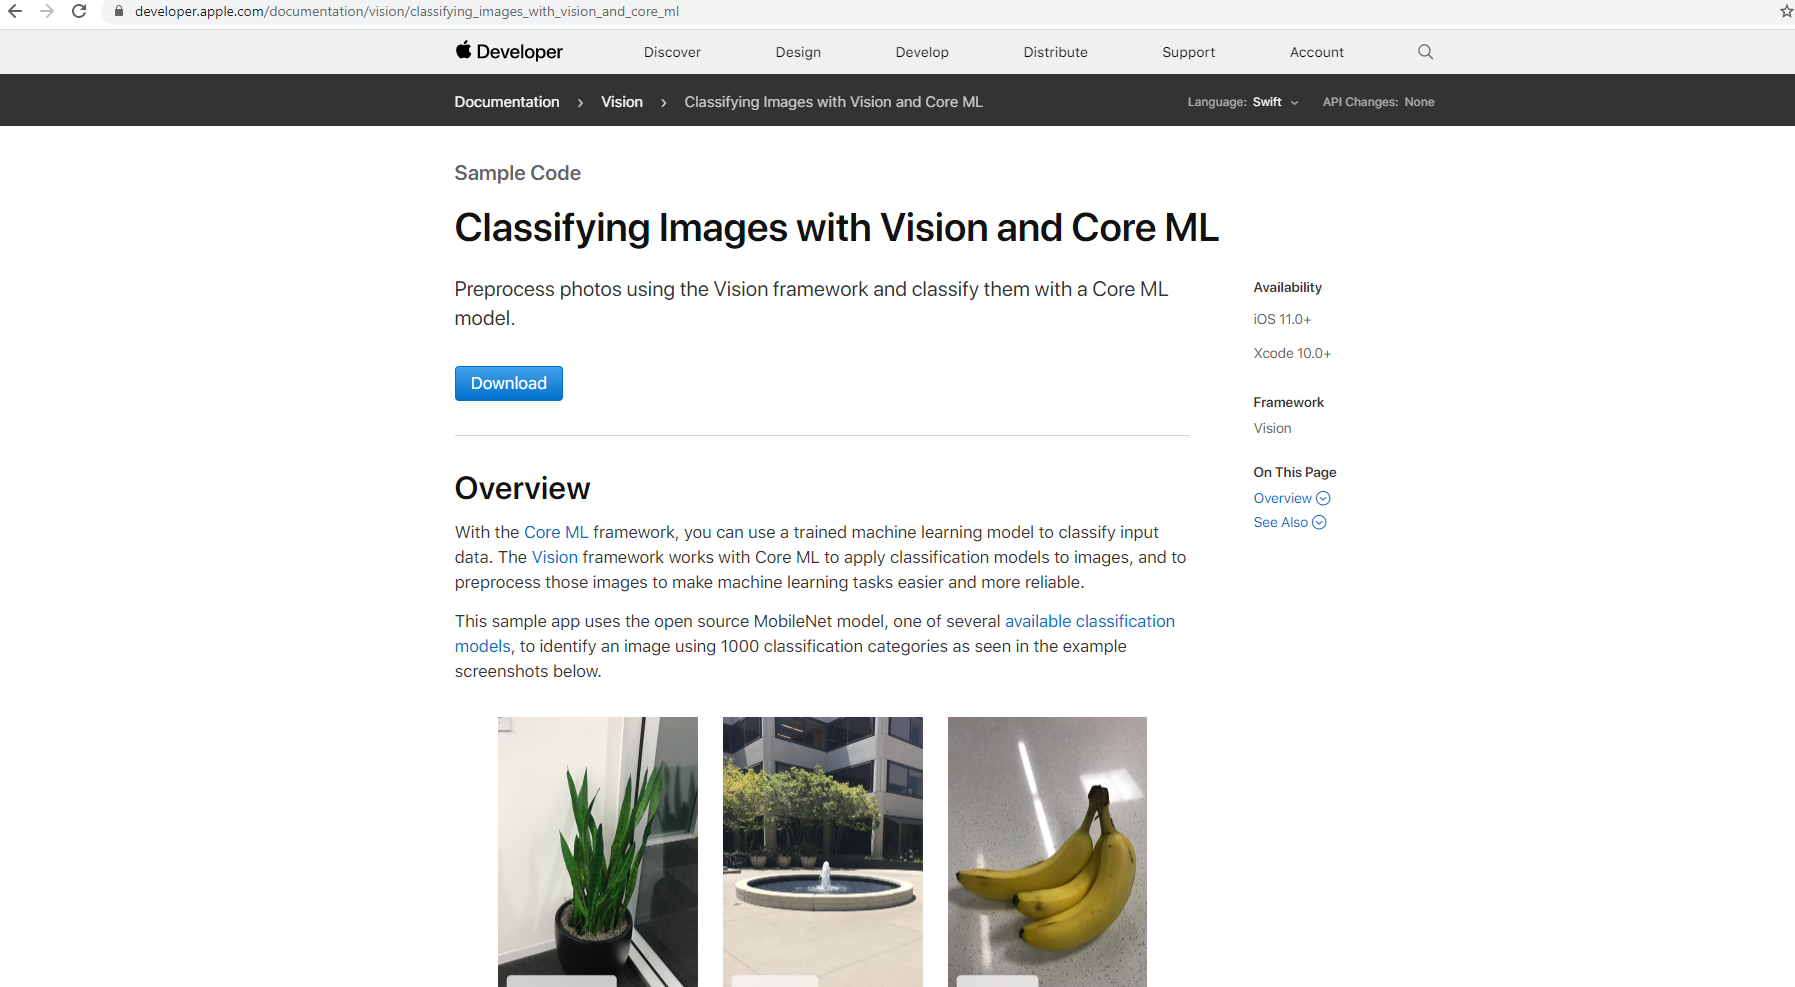
However, it appears that the mlmodel exported from Google AutoML is no longer compatible with the sample project 

As we can see in the following image the model outputs for the Google AutoML mlmodel don't line up with what the sample project is expecting:
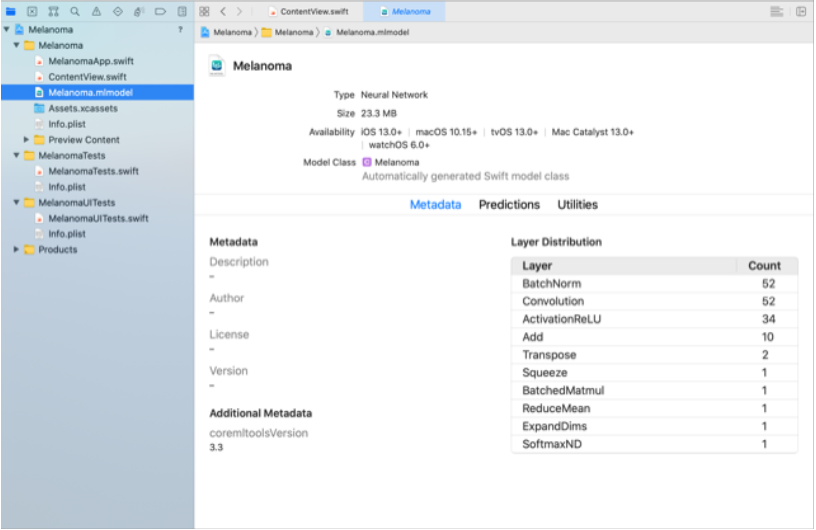

Because I don't know swift I wasn't able to figure out how to change this issue.  It was also found that you need to download a iOS 13+ simulator for the model to work properly.


# Conclusion

Let's try Create ML from Apple.  An end to end Apple model build should play nice together and hopefully everything should work.